In [23]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pymysql

In [27]:
conn=pymysql.connect(host='localhost',user='root',password='gani123',database='crime_data')

In [29]:
print('checking the connection')

checking the connection


In [31]:
print(conn)

In [33]:
import pandas as pd

In [35]:
query='SELECT * FROM crime_data.crime_data;'

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_sql(query,conn)
print(df)

         DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468  01-08-2020  01-08-2020    Southwest     624   
1    190101086  01-02-2020  01-01-2020      Central     624   
2    191501505  01-01-2020  01-01-2020  N Hollywood     745   
3    191921269  01-01-2020  01-01-2020      Mission     740   
4    200100502  01-02-2020  01-02-2020      Central     442   
..         ...         ...         ...          ...     ...   
494  200106614  02-07-2020  02-07-2020      Central     624   
495  200106615  02-07-2020  02-07-2020      Central     624   
496  200106616  02-07-2020  02-07-2020      Central     624   
497  200106617  02-07-2020  01-10-2020      Central     510   
498  200106618  02-07-2020  02-03-2020      Central     745   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2           

In [37]:
df=pd.read_csv(r"C:\Users\vostro  3405\Downloads\crime_data (3)\crime_data (2).zip")

In [39]:
print(df)

         DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468  01-08-2020  01-08-2020    Southwest     624   
1    190101086  01-02-2020  01-01-2020      Central     624   
2    191501505  01-01-2020  01-01-2020  N Hollywood     745   
3    191921269  01-01-2020  01-01-2020      Mission     740   
4    200100502  01-02-2020  01-02-2020      Central     442   
..         ...         ...         ...          ...     ...   
494  200106614  02-07-2020  02-07-2020      Central     624   
495  200106615  02-07-2020  02-07-2020      Central     624   
496  200106616  02-07-2020  02-07-2020      Central     624   
497  200106617  02-07-2020  01-10-2020      Central     510   
498  200106618  02-07-2020  02-03-2020      Central     745   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2           

In [43]:
print(df.shape)

(499, 13)


# Unique value in specific column

In [45]:
df=pd.DataFrame(df)
unique_value=df['Crm_Cd'].unique()
print(unique_value)

[624 745 740 442 946 341 330 930 648 354 230 761 350 310 480 623 440 510
 210 900 888 420 886 421 647 940 662 220 625 755 649 901 320 890 351 956
 820 812 920 850 666 343]


In [47]:
df=pd.DataFrame(df)
uni_value=df['AREA_NAME'].unique()
print(uni_value)

['Southwest' 'Central' 'N Hollywood' 'Mission' 'Van Nuys' 'Wilshire'
 'Rampart' 'Harbor' 'Pacific' 'Hollenbeck' 'West LA' 'Northeast'
 'Foothill' 'Hollywood' 'West Valley' '77th Street' 'Olympic' 'Devonshire'
 'Southeast']


# Determine trends in crime occurence in over time:

In [49]:
df['Date_Rptd']=pd.to_datetime(df['Date_Rptd'])
df['DATE_OCC']=pd.to_datetime(df['DATE_OCC'])
mc=df.resample('M',on='Date_Rptd').size()

# Trend basis on crime occurence in over time

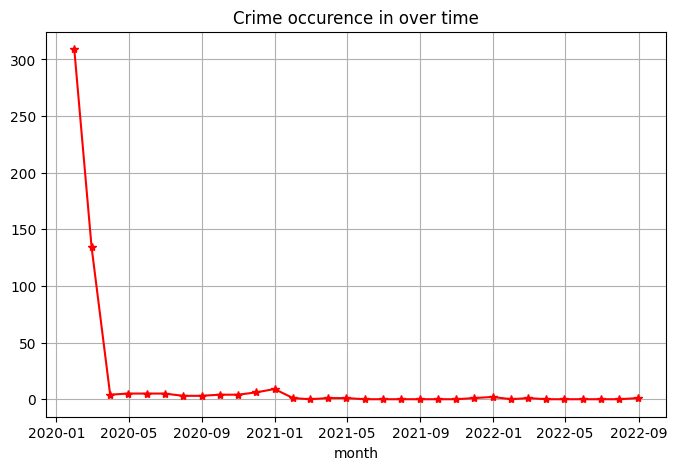

In [51]:
plt.figure(figsize=(8,5))
plt.plot(mc.index,mc.values,marker='*',color='red')
plt.title('Crime occurence in over time')
plt.xlabel('month')
plt.grid()
plt.show()

# Utilize the geographical information of latitude and longititude

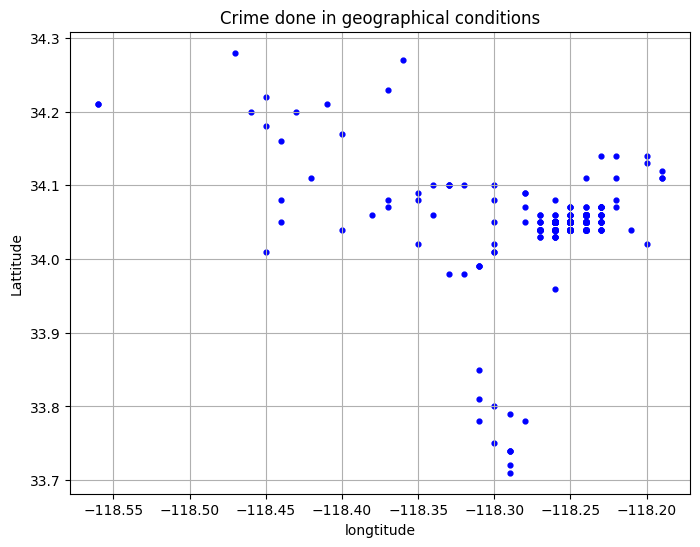

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(df['LON'],df['LAT'], s=12,color='blue')
plt.xlabel('longtitude')
plt.ylabel('Lattitude')
plt.grid()
plt.title('Crime done in geographical conditions')
plt.show()

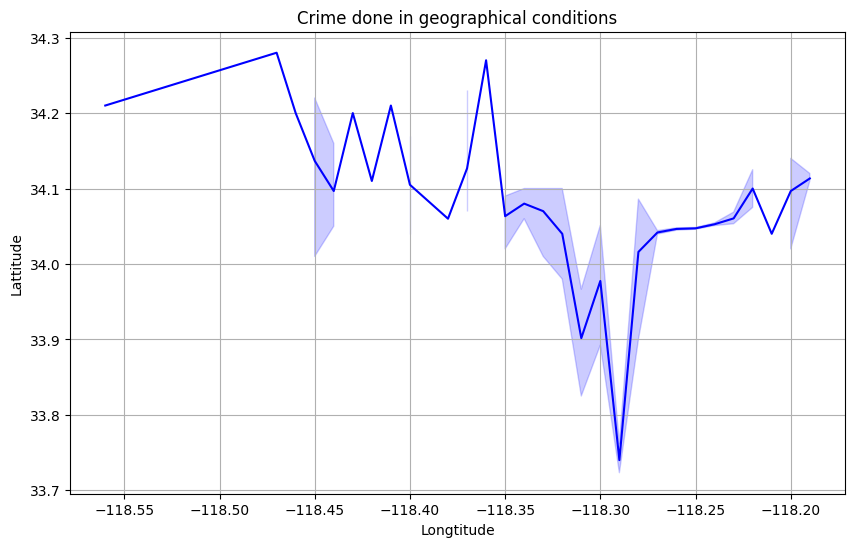

In [71]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['LON'],y=df['LAT'],color='blue')
plt.xlabel('Longtitude')
plt.ylabel('Lattitude')
plt.grid()
plt.title('Crime done in geographical conditions')
plt.show()

# Location Analysis:

In [55]:
location_count=df['Location'].value_counts()
print('Top 10 crime locations:',location_count)

Top 10 crime locations: Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
                      ..
14600 VANOWEN ST       1
600 N ALAMEDA ST       1
FLOWER                 1
400 COLYTON ST         1
2600 S FIGUEROA ST     1
Name: count, Length: 365, dtype: int64


# Crime Code Analysis:

In [57]:
code=df['Crm_Cd']
count_of_codes=code.value_counts()
print(count_of_codes)

Crm_Cd
330    82
624    74
440    44
442    28
510    28
341    26
230    24
740    23
745    23
888    19
310    16
210    12
480    11
354    10
420     9
350     9
930     7
623     5
761     5
662     5
946     4
220     4
648     3
901     3
850     2
956     2
351     2
320     2
625     2
886     2
900     2
755     1
649     1
940     1
647     1
890     1
421     1
820     1
812     1
920     1
666     1
343     1
Name: count, dtype: int64


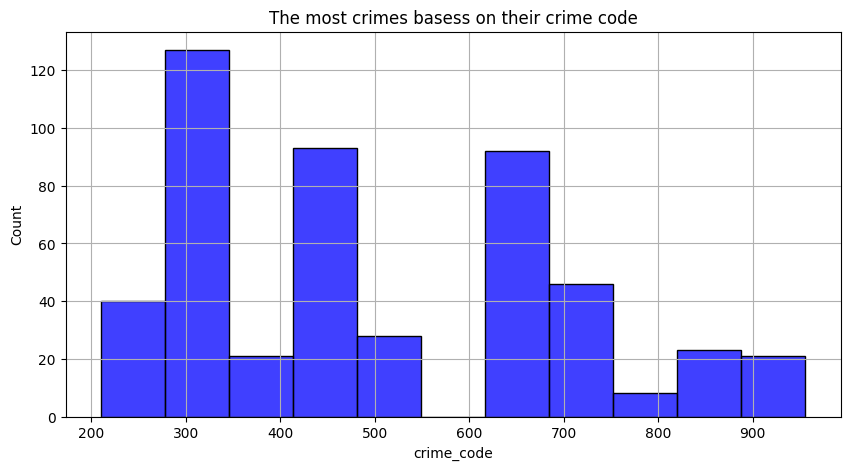

In [59]:
plt.figure(figsize=(10,5))
plt.style.use('default')
sns.histplot(df['Crm_Cd'],color='blue',edgecolor='black')
plt.title('The most crimes basess on their crime code')
plt.xlabel('crime_code')
plt.grid()
plt.show()

# Investigate the distribution of victim ages

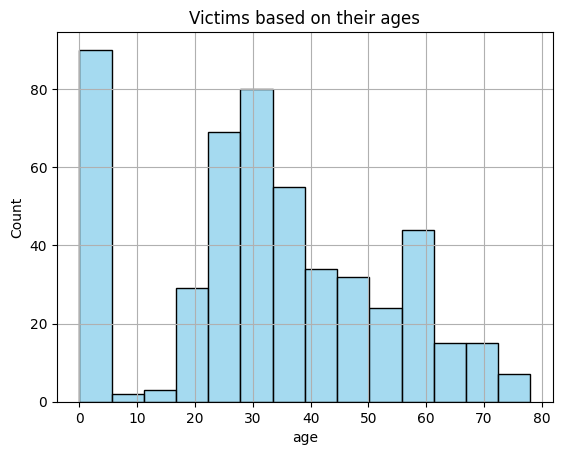

In [61]:
plt.figure(figure=(10,5))
sns.histplot(df['Vict_Age'],color='skyblue',edgecolor='black')
plt.title('Victims based on their ages')
plt.xlabel('age')
plt.grid()

plt.show()

# Distributation of Victim genders

<Axes: xlabel='Vict_Sex', ylabel='count'>

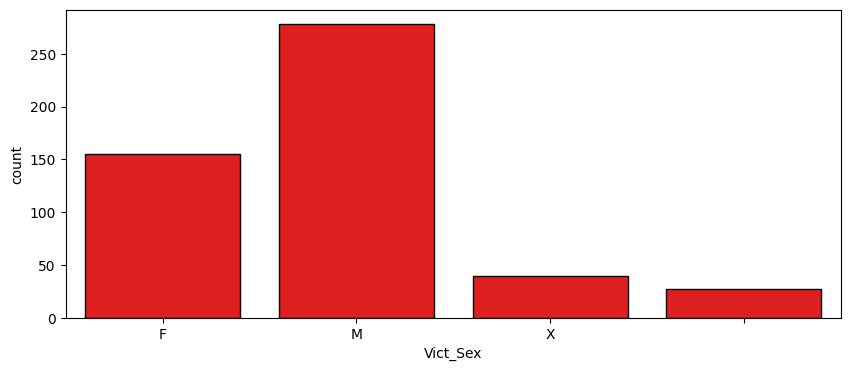

In [63]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['Vict_Sex'],edgecolor='black',color='red')

# Identify common premises descriptions where crimes occur

In [65]:
pr=df['Premis_Desc']
cop=pr.value_counts()
print(cop)

Premis_Desc
STREET                                          105
SIDEWALK                                         62
PARKING LOT                                      46
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     45
SINGLE FAMILY DWELLING                           25
                                               ... 
MINI-MART                                         1
SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS      1
MEDICAL/DENTAL OFFICES                            1
DETENTION/JAIL FACILITY                           1
MTA PROPERTY OR PARKING LOT                       1
Name: count, Length: 67, dtype: int64


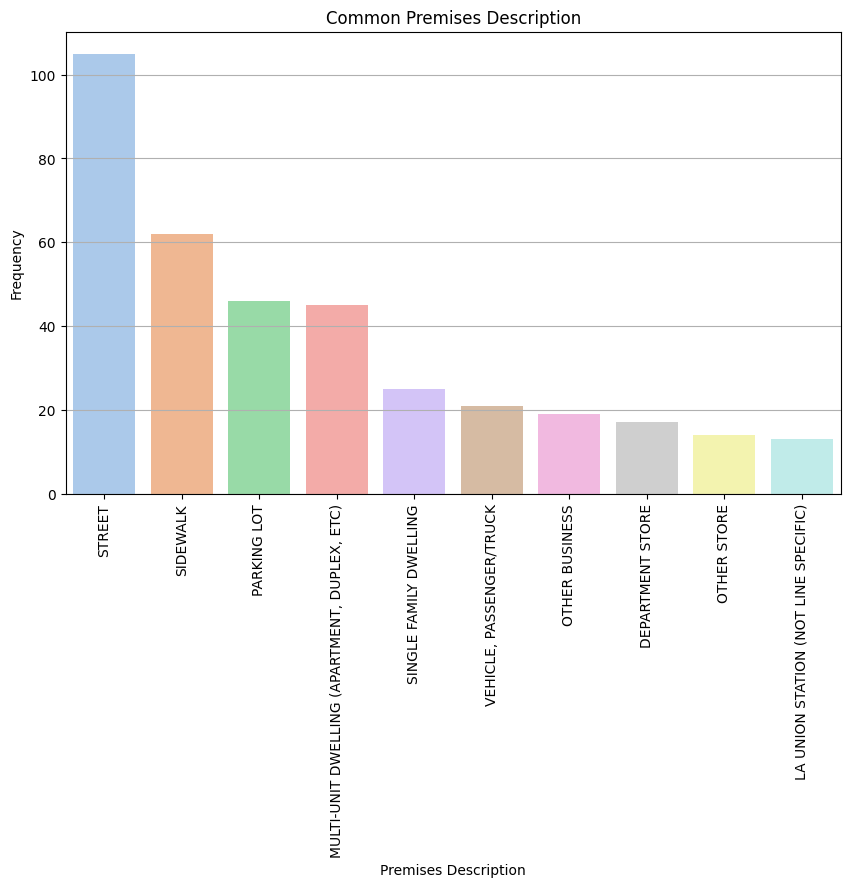

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Premis_Desc', order=df['Premis_Desc'].value_counts().index[:10], palette='pastel')
plt.title('Common Premises Description')
plt.xlabel('Premises Description')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Examine the states of reported crimes:

In [87]:
Crm=df['Status']
status_count=Crm.value_counts()
print(status_count)

Status
IC    447
AA     27
AO     24
JO      1
Name: count, dtype: int64


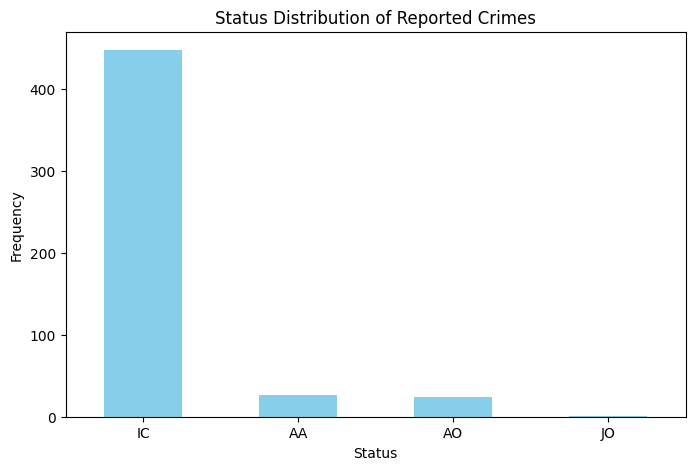

In [85]:
query = "SELECT * FROM crime_data.crime_data"

status_data = pd.read_sql(query,conn)

#classify crimes by status
status_counts = status_data['Status'].value_counts()

#cisualize status distribution
plt.figure(figsize=(8,5))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Status Distribution of Reported Crimes')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()




# Generating pie chart

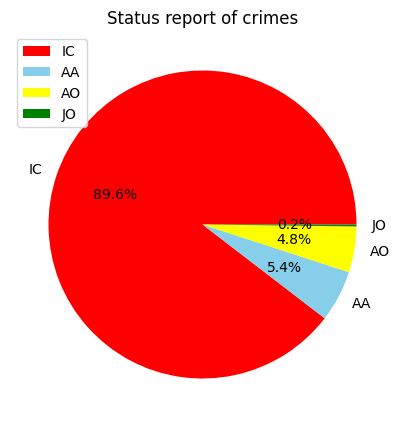

In [69]:
plt.figure(figsize=(6,5))
plt.pie(status_count,labels=status_count.index,autopct='%1.1f%%',colors=['red','skyblue','yellow','green'])
plt.title('Status report of crimes')
plt.legend()
plt.show()

# Questions:

In [ ]:
1. Where are the geographical hostspots for reported crimes?

In [ ]:
Answer: Geographical hostsports for reported crimes the places where the crimes occured most and it is in California, Los
        Angeles

In [ ]:
1. What is the distribution of victim ages in reported crimes?

In [ ]:
Answer: More crimes took place for ages 0 which might be an outlier. Apart from that, maximum of the crimes are observed
        under age 10.

In [ ]:
Is there a significiant difference in crimes rates between male and female victims?

In [ ]:
Yes, there is a significant difference in crime count between male and female as crime count of male is as much double as female crime count.

In [ ]:
1. Where do most crimes occur based on the "Location" cloumn?

In [90]:
df['Location'].nunique()

365

In [92]:
df['Location'].value_counts()

Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
                      ..
14600 VANOWEN ST       1
600 N ALAMEDA ST       1
FLOWER                 1
400 COLYTON ST         1
2600 S FIGUEROA ST     1
Name: count, Length: 365, dtype: int64

In [ ]:
Answer: As location column unique values almost near to length of DataFrame i.e., all location present in the dataset are differnt, We cannot make
        any more inferences or conclude just basis on the location.

# Crime Code Analysis

In [ ]:
What is the distribution of reported crimes based on Crime Code?

In [ ]:
Answer: The Crime code '330' and '624' stood on the top with more crimes of 82 and 74.